## Data Mining and Machine Learning
### Edgar Acuna
### 1-D, 2-D,3-D Visualization in Python using four modules: plotnine, plotly, seaborn and bokeh 
####  September 2021

In [27]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#from ggplot import mtcars
import plotnine
from plotnine import *
import bokeh

In [28]:
#Funcion magica para que la grafica de matplotlib salga en la pantalla
%matplotlib inline

In [29]:
url= "https://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
names1=names[0:8]
data = pd.read_table(url, names=names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


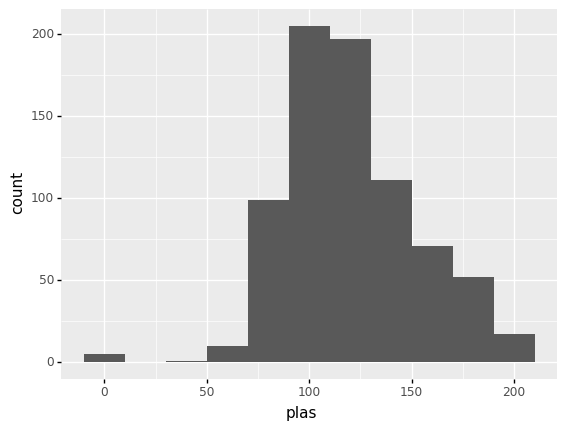

<ggplot: (174453670479)>

In [30]:
# Histograma de plass usando ggplot
p=ggplot(aes(x='plas'),data=data)+geom_histogram(binwidth=20)
p

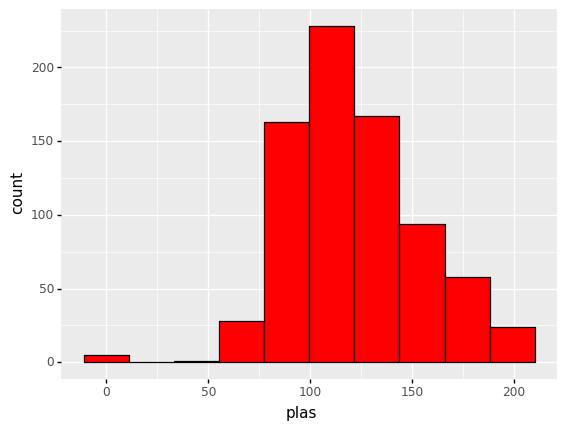

<ggplot: (174453703602)>

In [31]:
# Histograma de plas cpn 10 intervalos usando ggplot
p=ggplot(aes(x = 'plas'),data=data) 
p=p+geom_histogram(colour = "black" , fill = "red" , bins = 10)
p

### Histogram using seaborn

<AxesSubplot:xlabel='plas'>

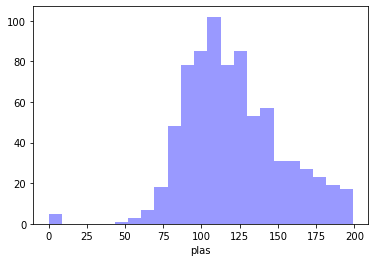

In [32]:
#Histogram de gpa usando seaborn
sns.distplot(data['plas'],kde=False, color="blue")

<AxesSubplot:xlabel='plas'>

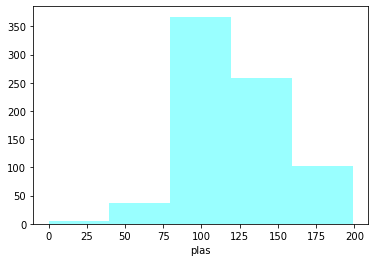

In [33]:
#otra vez el histograma en seaborn usando 5 intervalos
sns.distplot(data['plas'],bins=5, kde=False, color="cyan")

### Histograma usando Bokeh

In [34]:
#haciendo el histograma con Bokeh
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
arr_hist, edges = np.histogram(data['mass'], bins = 6)
# Put the information in a dataframe
datos2 = pd.DataFrame({'mass': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of mass',
          x_axis_label = 'mass', 
           y_axis_label = 'frecuencia absoluta')

p.quad(bottom=0, top=datos2['mass'], 
       left=datos2['left'], right=datos2['right'], 
       fill_color='red', line_color='black')

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [35]:
#Histograma usando plotly
import plotly 
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

x = data['plas']
data = [go.Histogram(x=x)]

plotly.offline.iplot(data, filename='histograma en plotly')

### Haciendo un segundo ejemplo con el conjunto de dato mtcars que viene dentro de seaborn

In [36]:
mtcars = sns.load_dataset('mpg')
mtcars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<AxesSubplot:xlabel='mpg'>

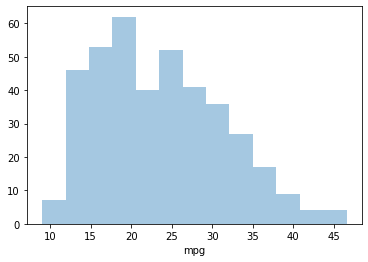

In [37]:
#Haciendo el histograma cpn seaborn
sns.distplot(mtcars['mpg'],kde=False)

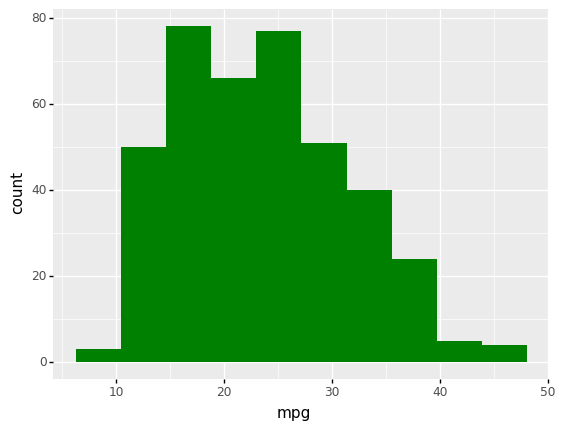

<ggplot: (174453998999)>

In [38]:
#Haciendo el histograma con ggplopt
p = ggplot(aes(x='mpg'), data=mtcars)
p+geom_histogram(fill="green",bins=10)

### Plotting Time series

### Comparando muertes y nacimientos en Puerto Rico a traves del tiempo

In [39]:
df2=pd.read_csv("http://academic.uprm.edu/eacuna/demografiaPR.csv")
df2.head()

,year,Nacimientos,Muertes
0,1980,73060,20486
1,1981,71365,21197
2,1982,69336,21522
3,1983,65742,21499
4,1984,63321,21733


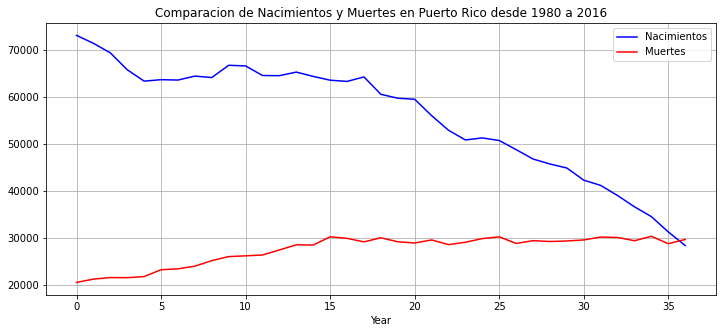

In [40]:
plt.figure(figsize=(12,5))
plt.xlabel('Year')
plt.title("Comparacion de Nacimientos y Muertes en Puerto Rico desde 1980 a 2016")
ax1 = df2.Nacimientos.plot(color='blue', grid=True, label='Nacimientos')
ax2 = df2.Muertes.plot(color='red', grid=True, label='Muertes')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend()
plt.show()

### La intensidad de los temblores en Puerto Rico desde el 27 de Diciembre  del 2019 hasta Febreo 16,2020

In [41]:
dfts1=pd.read_csv("https://academic.uprm.edu/eacuna/tspreq.csv")
dfts1.head()
dfts1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       2239 non-null   int64  
 1   Month      2239 non-null   int64  
 2   Day        2239 non-null   int64  
 3   Time       2239 non-null   object 
 4   Lat        2239 non-null   float64
 5   Lon        2239 non-null   float64
 6   Depth      2239 non-null   float64
 7   Mag        2239 non-null   float64
 8   Region     2239 non-null   object 
 9   Timestamp  2239 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 175.0+ KB


<AxesSubplot:xlabel='time'>

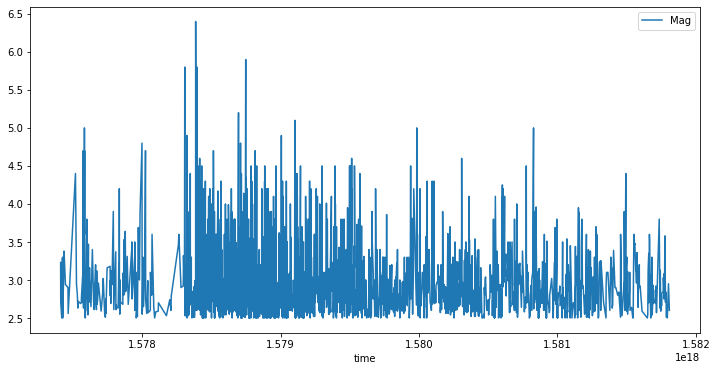

In [42]:
df2=pd.to_datetime(dfts1[['Year', 'Month', 'Day']])+pd.to_timedelta(dfts1.Time)
df3=[df2,dfts1["Mag"]]
df3=np.transpose(df3)
df4=pd.DataFrame(df3,columns=['time','Mag'])
df4.set_index('time', inplace=True)
df4.head()
df4.plot(figsize=[12,6])

### Scatterplot 3D using matplotlib

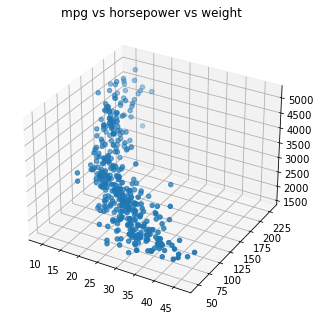

In [43]:
# Scatterplot 3D usando matplotlib
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
ax = Axes3D(fig)
pyplot.title("mpg vs horsepower vs weight")
ax.scatter(mtcars['mpg'],mtcars['horsepower'],mtcars['weight'])
pyplot.show()

### Scatterplot 3D using plotly

In [44]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)
import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='simple-3d-scatter')

#### Wireframe with plotly

In [45]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)
import numpy as np

# Creating the data
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
xGrid, yGrid = np.meshgrid(y, x)
R = np.sqrt(xGrid ** 2 + yGrid ** 2)
z = np.sin(R)

# Creating the plot
lines = []
line_marker = dict(color='#0066FF', width=2)
for i, j, k in zip(xGrid, yGrid, z):
    lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

layout = go.Layout(
    title='Wireframe Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    ),
    showlegend=False,
)
fig = go.Figure(data=lines, layout=layout)
py.offline.iplot(fig, filename='wireframe_plot')